In [7]:
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.colors import Normalize
import numpy as np
import torch 
from data.oasis.load_oasis3 import give_oasis_data
from sklearn.manifold import TSNE

In [8]:
df=pd.read_csv("visualization/data/oasis_run_3_isomap.csv")

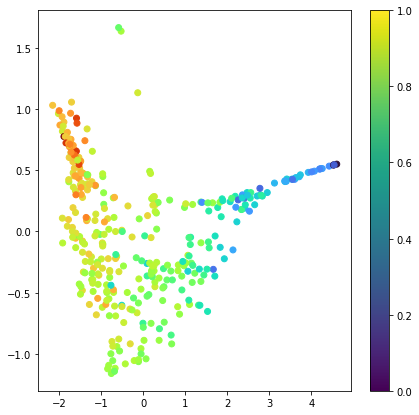

In [9]:
fig,ax=plt.subplots(ncols=1,nrows=1,figsize=(7,7))
norm=Normalize(vmin=df['age'].min(),vmax=df['age'].max())
cmap=plt.cm.turbo
pm=ax.scatter(df["tSNE1"].to_numpy(),df["tSNE2"].to_numpy(),marker='o', color=cmap(norm(df['age'])))
fig.colorbar(pm,ax=ax)

In [10]:
x_min=-2
x_max=4
y_min=-1.0
y_max=0.7
n_grid_points=10
x_points=np.linspace(x_min,x_max,n_grid_points)
y_points=np.linspace(y_min,y_max,n_grid_points)


In [11]:
train_dataset,_=give_oasis_data('train', batch_size=5,
                                        num_workers=4,
                                        shuffle=False,
                                        debug=False,
                                        preprocessing='min',
                                        task='age',
                                        share=1.)


Loading share 1.00 train data.


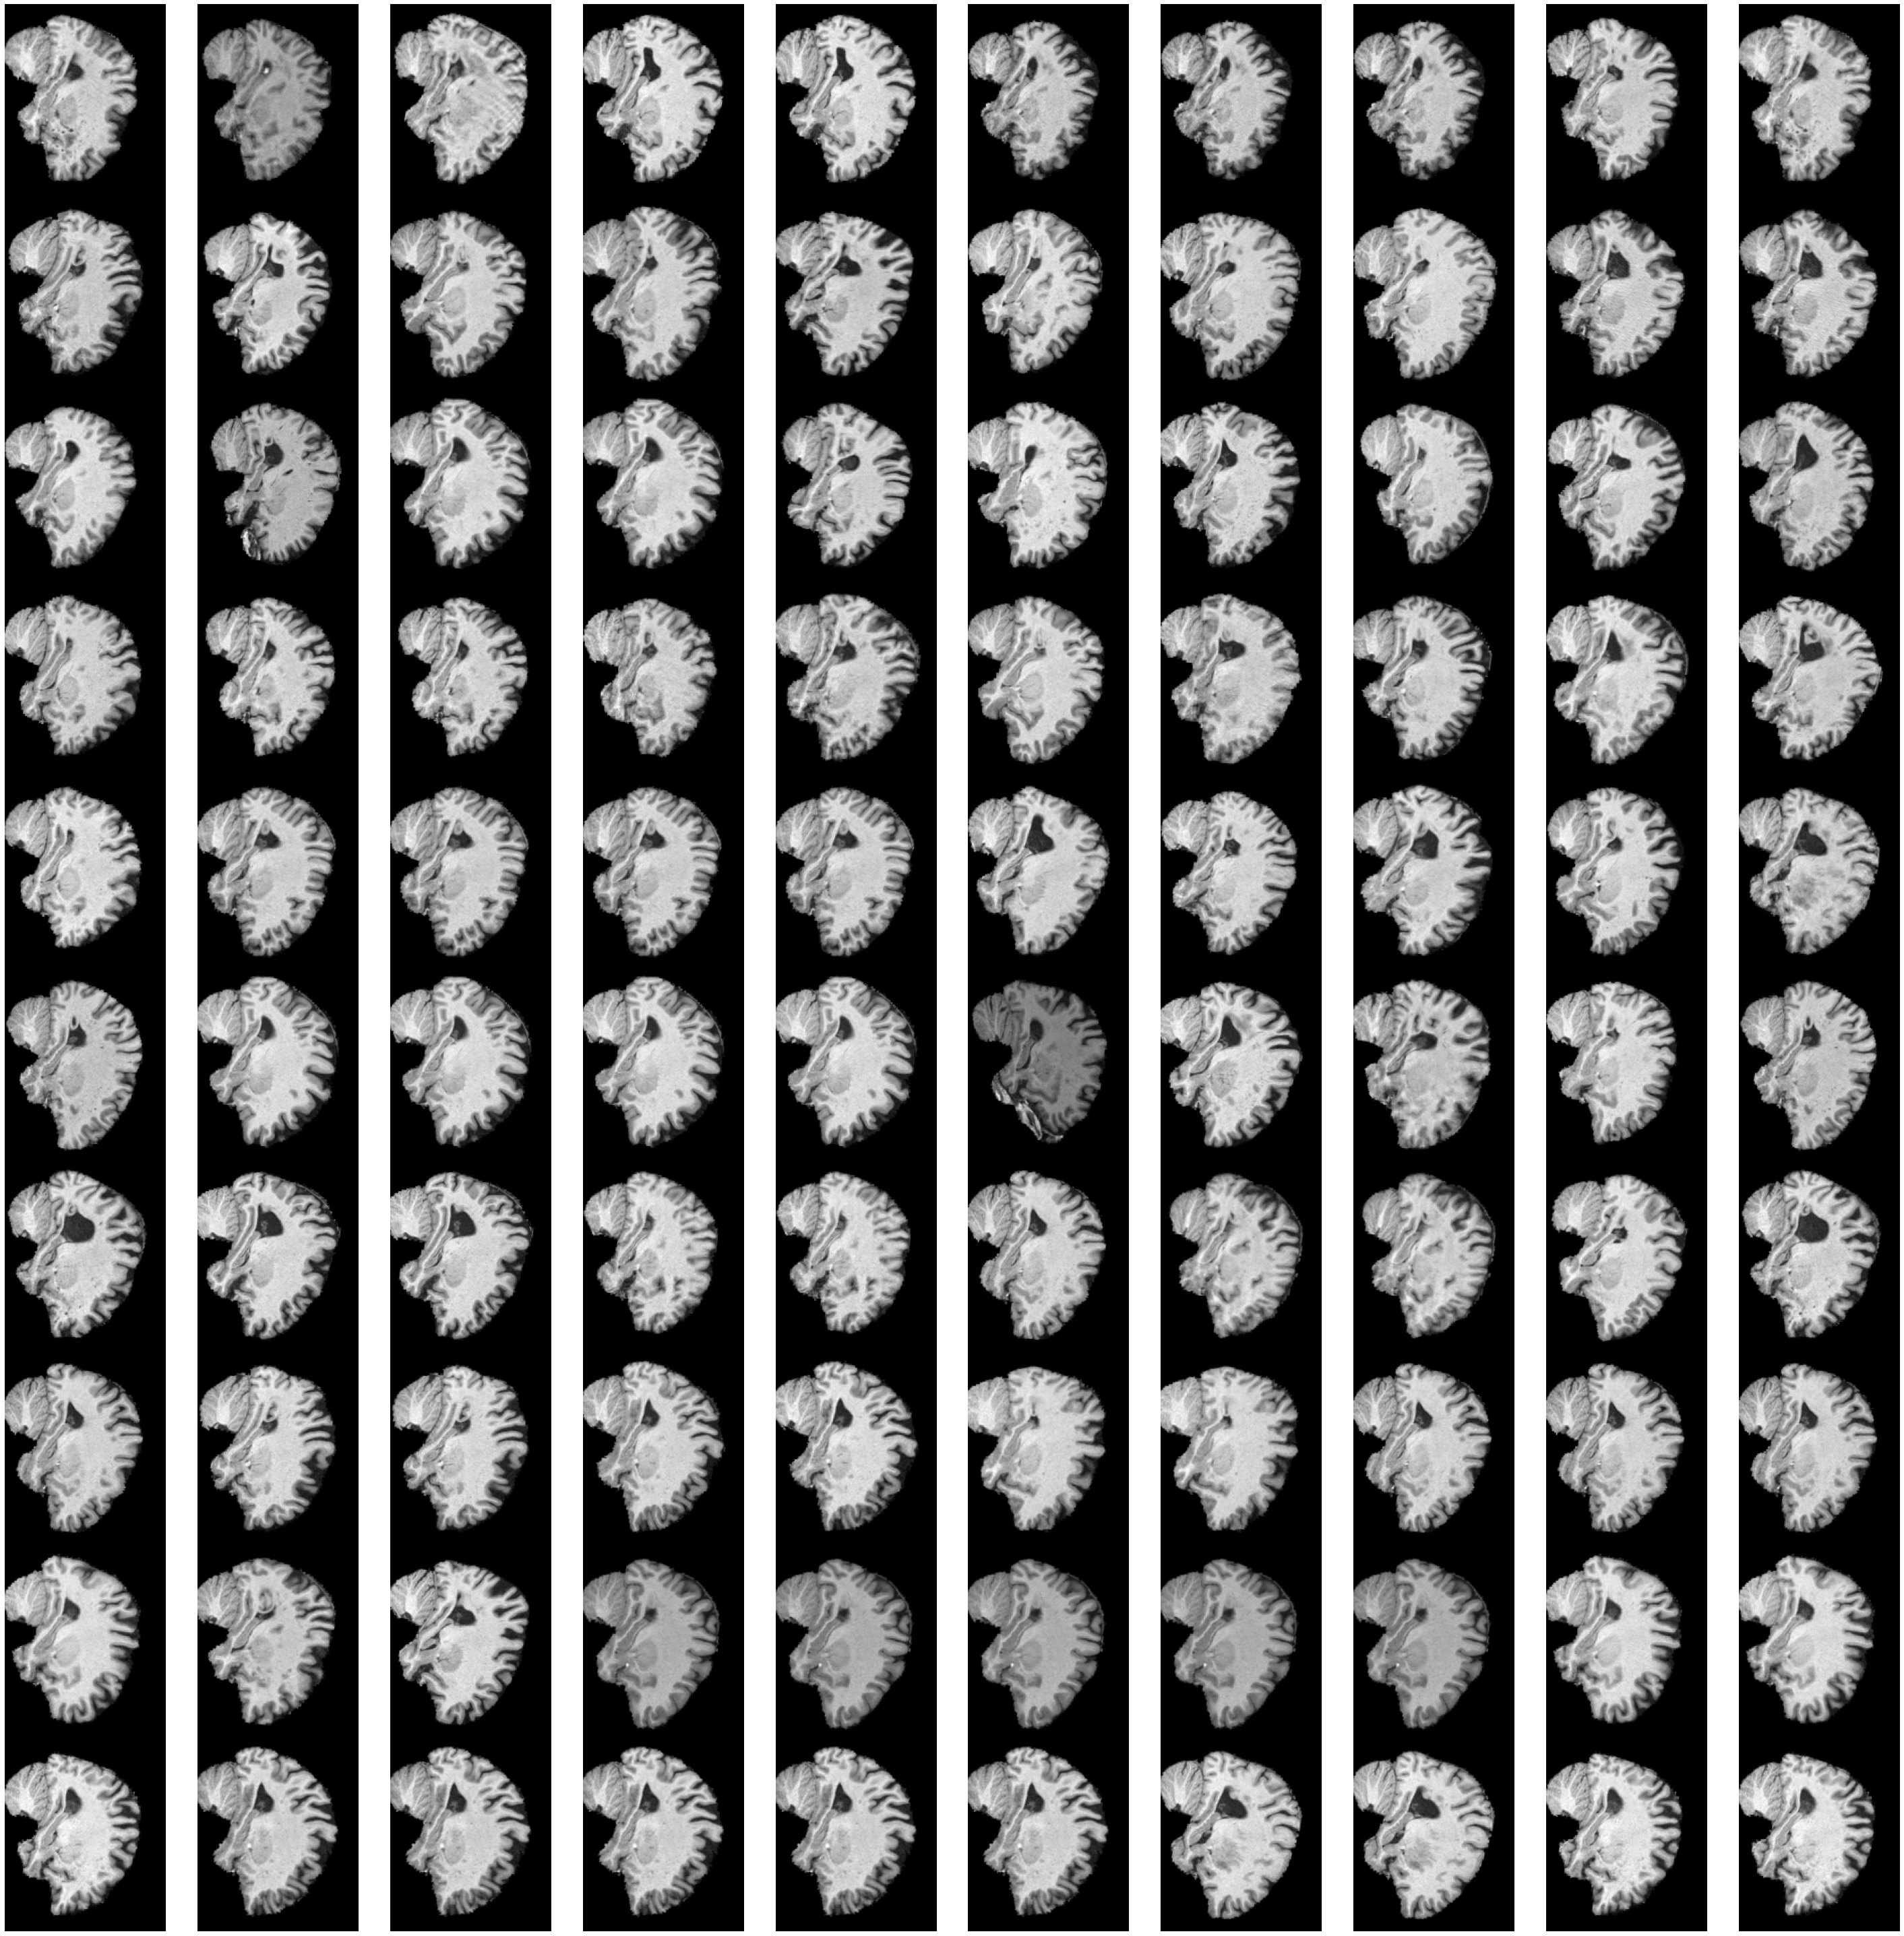

In [12]:
fig,ax=plt.subplots(nrows=n_grid_points,ncols=n_grid_points,figsize=(40,40))
slice=50
for n_x in range(n_grid_points):
    for n_y in range(n_grid_points):
        grid_point=np.array([x_points[n_x],y_points[-n_y]])
        data_tsne=df[["tSNE1","tSNE2"]].values
        dist=np.linalg.norm(data_tsne-grid_point[None,:],axis=1)
        idx=np.argmin(dist)
        image,label=train_dataset.get_data(idx)
        image=image.squeeze()
        ax[n_x,n_y].imshow(image[slice],'gray')
        ax[n_x,n_y].axis('off')
        #ax[n_x,n_y].set_title("Age: %.1f "%label[0])
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
